In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def stackImages(scale, imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range(0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0,0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1] ,imgArray[0][0].shape[0]), None, scale, scale)
                
                if len(imgArray[x][y].shape) == 2:
                    imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank] * rows
        hor_con = [imageBlank] * rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0,rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0,0), None,scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
            if len(imgArray[x].shape) == 2:
                imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor = np.hstack(imgArray)
        ver = hor
    return ver

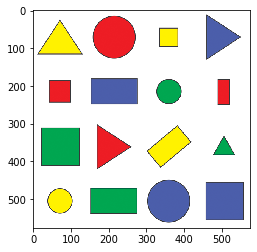

In [12]:
def getContours(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area > 500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0 ,0), 3)
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            if objCor == 3:
                objectType = "Tri"
            elif objCor == 4:
                aspRatio = w/ float(h)
                if aspRatio > 0.98 and aspRatio< 1.03:
                    objectType = "Square"
                else:
                    objectType = "Rectangle"
            elif objCor > 4:
                objectType = "Circle"
            else:
                objectType = "None"
                    
            cv2.rectangle(imgContour, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(imgContour, objectType, (x + (w//2) -10, y + (h//2) - 10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,0,0), 2)

img = cv2.imread('shape.png')
imgContour = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [15]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 1)
imgCanny = cv2.Canny(imgBlur, 50, 50)
getContours(imgCanny)

imgBlank = np.zeros_like(img)
imgStack = stackImages(0.8, ([img, imgGray, imgBlur], [imgCanny, imgContour, imgBlank]))

cv2.imshow("Stack", imgStack)
cv2.waitKey(0)

3578.5
8
8620.0
4
10494.5
4
10244.0
8
1619.0
3
10480.0
4
6363.5
4
5606.0
3
3473.0
4
2267.5
4
3559.5
8
8680.0
4
2643.0
4
5674.5
3
10191.0
8
5721.5
3


-1